# K-Nearest Neighbors

## 1. Decision Boundary and the effect of K

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 7

# import some data to play with
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 10])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
X = np.vstack((x1,x2)).T


y = np.array([1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def knn1(x1, x2, y, n_neighbors = 7):
    
    X = np.vstack((x1,x2)).T
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("KNN ((k = %i, weights = '%s')"
                  % (n_neighbors, weights))

    plt.show()


In [3]:
# import some data to play with
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 10])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])

y = np.array([1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])

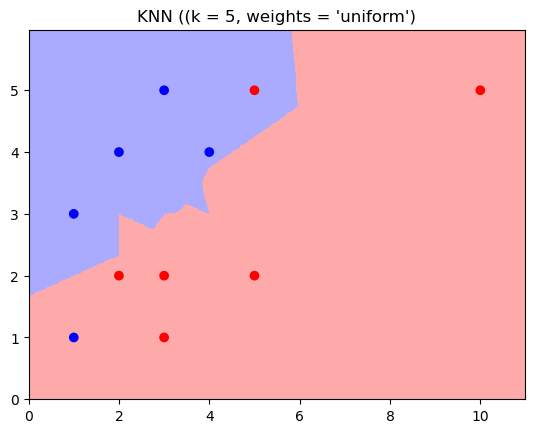

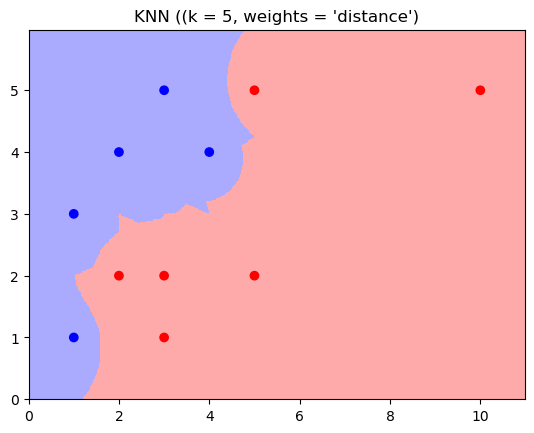

In [15]:
knn1(x1, x2, y, n_neighbors = 5)

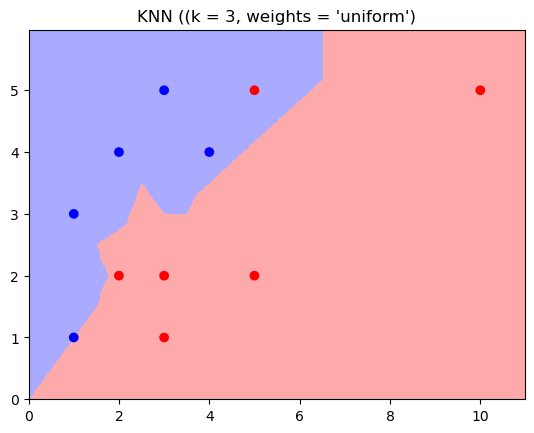

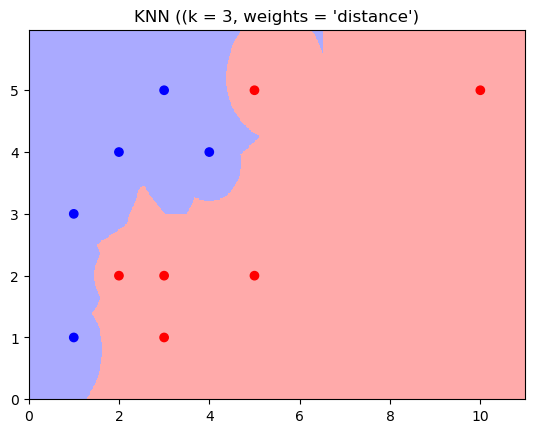

In [5]:
knn1(x1, x2, y, n_neighbors = 3)

### Show the nearest neighbors for a given points

In [6]:
clf = neighbors.KNeighborsClassifier(3)
clf.fit(X, y)

new_sanple = [1,2]

distances, indices = clf.kneighbors(np.array(new_sanple).reshape(1,-1),
n_neighbors=6)
print(distances.round(1))
print(indices)

[[1.  1.  1.  2.  2.2 2.2]]
[[0 2 1 5 3 4]]


# Comparing with other tree-based models

### Random Forest

Text(0.5, 1.0, 'Random Forest')

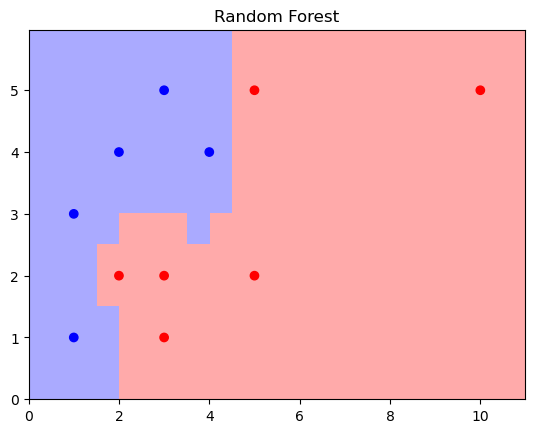

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Random Forest')

### Decision Tree

Text(0.5, 1.0, 'Decision Tree')

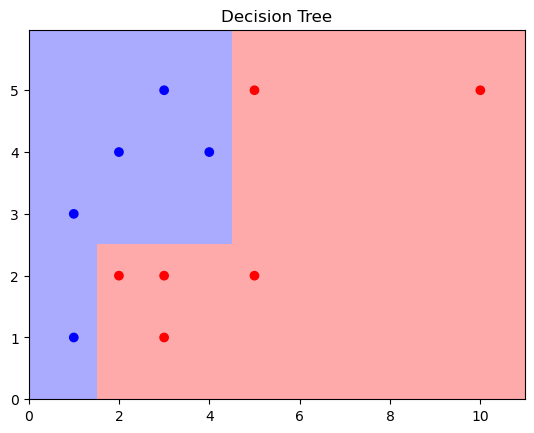

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Tree')

### Gradient Boosting

Text(0.5, 1.0, 'Gradient Boosting')

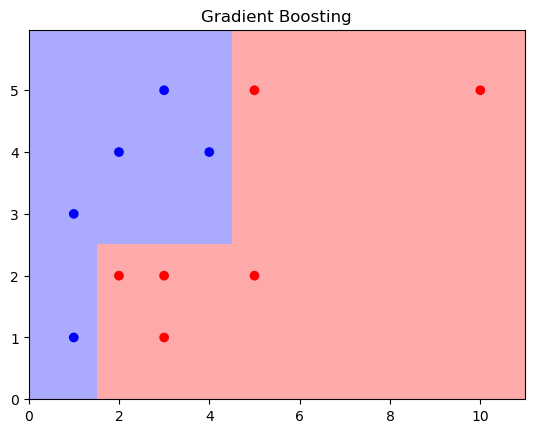

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 1)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Gradient Boosting')

### Logistic Regression

Text(0.5, 1.0, 'Logistic Regression')

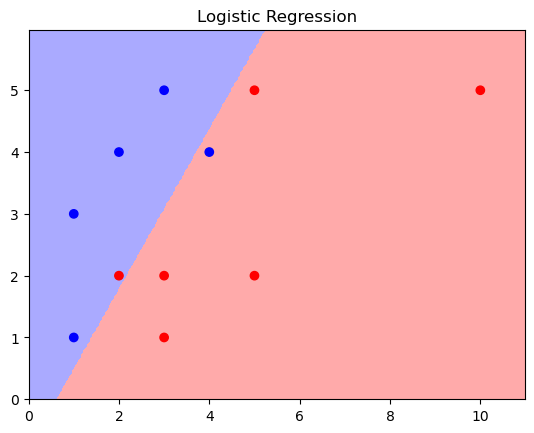

In [10]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import some data to play with
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 10])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
X = np.vstack((x1,x2)).T

y = np.array([1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression')

### LDA

Text(0.5, 1.0, 'Logistic Regression')

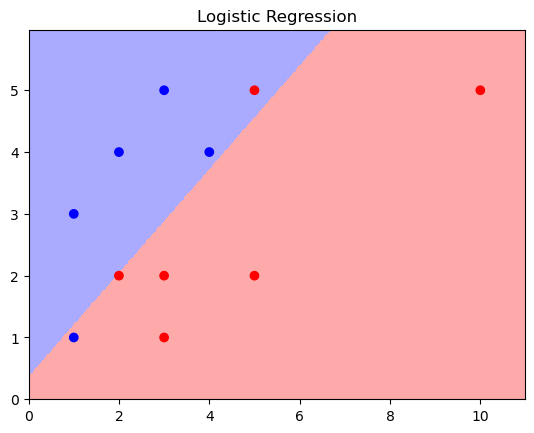

In [11]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import some data to play with
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 10])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
X = np.vstack((x1,x2)).T

y = np.array([1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression')